In [1]:
from ROOT import *
import numpy as np 
import matplotlib.pyplot as plt
%jsroot on


Welcome to JupyROOT 6.28/04


In [2]:
def calculate_efficiency(n_det, gamma_energy, n_events, scint_LY):
    max_det = gamma_energy * n_events * scint_LY
    return n_det/max_det

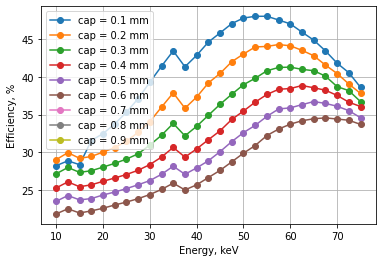

In [32]:
%matplotlib inline
# %matplotlib qt
data = {s:[[],[]] for s in np.arange(0.1,2.1,0.1)}
n_evts = 25000

for cap_thick in np.arange(0.1,0.7,0.1):
    for energy in np.arange(10,77,2.5):
        energy = int(energy) if float(energy).is_integer() else energy
        en_scan_file = TFile.Open(f"/mnt/j/result/MU_inv_{energy}keV_cap_{cap_thick:.1f}mm_col_100um.root")
        n_phot = en_scan_file.Detected_photons.GetEntries() - n_evts
        efficiency = calculate_efficiency(n_phot, energy, n_evts, 20)
        data[cap_thick][0].append(energy)
        data[cap_thick][1].append(efficiency*100)


plt.grid(True)
plt.xlabel("Energy, keV")
plt.ylabel("Efficiency, %")

for cap_thick in np.arange(0.1,1.0,0.1):
    plt.plot(data[cap_thick][0],data[cap_thick][1],"o-", label=f"cap = {cap_thick:.1f} mm")

plt.legend()
plt.show()

In [23]:
en_scan_file = TFile.Open(f"/mnt/g/result/MU_inv_10keV_cap_0.0mm_col_100um.root")
en_scan_file.Detected_photons.GetEntries()

1148150

In [17]:
import os, re

file_names = os.listdir("/mnt/g/result_cap_col")


def extract_numbers(filename):
    # Regular expression pattern
    pattern = r'^cap_col_(\d+(?:\.\d+)?)keV_cap_(\d+(?:\.\d+)?)mm\.root$'

    # Search for pattern
    match = re.search(pattern, filename)

    if match:
        return match.groups()
    else:
        return None

for file in file_names:
    if (extract_numbers(file) != None):
        f_n_phot = TFile.Open(f"/mnt/g/result_cap_col/{file}")
        n_phot = f_n_phot.Detected_photons.GetEntries()
        print(float(extract_numbers(file)[0]), float(extract_numbers(file)[1]), n_phot)

100.0 0.9 11845303
100.0 1.0 11385155
102.5 0.9 12217916
102.5 1.0 11822399
105.0 0.9 12518146
105.0 1.0 12145337
107.5 0.9 12789925
107.5 1.0 12354102
10.0 0.8 732000
10.0 0.9 677654
10.0 1.0 829583
110.0 0.9 12936226
110.0 1.0 12543319
112.5 0.9 13302794
112.5 1.0 12887749
115.0 0.9 13482453
115.0 1.0 13117294
117.5 0.9 13646115
117.5 1.0 13313637
12.5 0.8 1235984
12.5 0.9 1147301
12.5 1.0 1061779
120.0 0.9 25000
120.0 1.0 13306337
122.5 0.9 25000
122.5 1.0 13513909
125.0 0.9 13906921
125.0 1.0 13595214
127.5 0.9 14023291
127.5 1.0 13913632
130.0 0.9 14093813
130.0 1.0 13974915
15.0 0.8 1440916
15.0 0.9 1336392
15.0 1.0 1237243
17.5 0.8 1693978
17.5 0.9 25000
17.5 1.0 1455981
20.0 0.8 1967119
20.0 0.9 25000
20.0 1.0 1690987
22.5 0.8 2247992
22.5 0.9 2082561
22.5 1.0 1932105
25.0 0.8 2539285
25.0 0.9 2355046
25.0 1.0 2181587
27.5 0.8 25000
27.5 0.9 2642817
27.5 1.0 2445712
30.0 0.8 3171277
30.0 0.9 2939298
30.0 1.0 2724419
32.5 0.8 3527133
32.5 0.9 3266612
32.5 1.0 3018162
35.0 0.8 25

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

data = np.loadtxt("data_cap_col.txt")
data_dict = {x:[[],[]] for x in set(data.T[1])}
for entry in data:
    en, cap_th, n_phot = entry
    data_dict[cap_th][0].append(en)
    data_dict[cap_th][1].append(n_phot)
    

Cesium (Cs):

Kα: 30.5 keV
Kβ: 35.0 keV
Lead (Pb):

Kα: 74.96 keV
Kβ: 84.9 keV
Lα: 10.55 keV
Lβ: 12.61 keV
Lγ: 15.2 keV
Bromine (Br):

Kα: 11.9 keV
Kβ: 13.3 keV

In [4]:
hex_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
print([TColor.GetColor(hc) for hc in hex_colors])

[1179, 1180, 1181, 414, 623, 1182, 1183, 95, 1184, 1185, 391, 1186]


In [19]:
gROOT.ProcessLine(".L lhcbStyle.C")
# lhcbStyle()
import ROOT
# Create a new canvas.
c1 = TCanvas("c1", "multigraph", 800,600)
mg = ROOT.TMultiGraph()

leg = TLegend(0.75, 0.5, 0.95, 0.95)
i=0
colors = [1179, 1180, 1181, 414, 623, 1182, 1183, 95, 1184, 1185, 391, 1186]
for cap_thick in sorted(set(data.T[1])):
    en, n_phot = np.array(data_dict[cap_thick][0]),np.array(data_dict[cap_thick][1])
    eff = calculate_efficiency(n_phot, en, 25000, 20)*100
    sort = np.argsort(en)
    gr = TGraph(en.size, en[sort], eff[sort])
    gr.SetLineColor(colors[i%len(colors)])
    gr.SetMarkerColor(colors[i%len(colors)])
    i+=1
    gr.SetMarkerStyle(6)
    leg.AddEntry(gr,f" cap = {cap_thick} mm","l")
    mg.Add(gr)

# plt.show()
mg.Draw("APC")

mg.GetXaxis().SetTitle("Energy, keV")
mg.GetYaxis().SetTitle("Efficiency, %")

k_beta_lines = [13.3,35,85]
plot_lines = []
for i, en in enumerate(k_beta_lines):
    plot_lines.append(TLine(en, c1.GetUymin(), en, c1.GetUymax()))
    plot_lines[i].SetLineColor(kBlack)
    plot_lines[i].SetLineWidth(2)
    plot_lines[i].Draw()


# Add text
latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextSize(0.035)
latex.DrawLatex(0.2, 0.89, "K_{#beta}(Br)")
latex.DrawLatex(0.3, 0.89, "K_{#beta}(Cs)")
latex.DrawLatex(0.6, 0.89, "K_{#beta}(Pb)")

leg.Draw()
# Update the canvas to show the graph.
c1.SetGrid()
c1.Draw()

-------------------------
Set LHCb Style - Feb 2012
-------------------------


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [38]:
gStyle.Reset()
file = TFile.Open("/mnt/g/result_cap/cap_95keV_cap_0.7mm.root")
c = TCanvas()
file.Detected_photons.Draw("x:z","pid<0","colz")
c.Draw()

In [16]:
TBrowser()

Warning in <TBrowser::TBrowser>: The ROOT browser cannot run in batch mode
